# Introduction to Anomaly Detection in Time Series 

**Notes**

This is a Supporting Introductory Notebook for my Linked in Series in Anomaly Detection

**REFERENCE LINKS**

- Anomaly Detection in Time Series -Part 1 Level Shift
https://www.linkedin.com/pulse/anomaly-detection-time-series-part-1-level-shift-dr-anish-utcic/


- Anomaly Detection Part 2 – Isolation Forest
https://www.linkedin.com/pulse/anomaly-detection-part-2-isolation-forest-roychowdhury-ph-d--qfyac/


- Anomaly Detection Part 3 – Local Outlier Factor
https://www.linkedin.com/pulse/anomaly-detection-part-3-local-outlier-factor-roychowdhury-ph-d--khshc/

- Anomaly Detection Part 4 - using Auto Encoders 
https://www.linkedin.com/posts/activity-7285011475323109376-oD3A?utm_source=share&utm_medium=member_desktop

#### Import and Installs 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Section 1 :  Background

## What is Anomaly Detection

Anomaly detection is the process of identifying data points, patterns, or events that significantly deviate from the norm within a dataset. These outliers typically represent rare or unexpected behaviours, making them critical in various domains such as fraud detection, system performance monitoring, and predictive maintenance. The primary goal of anomaly detection is to recognize unusual occurrences that may indicate potential risks, failures, or opportunities, enabling timely intervention or decision-making.

## Background on Time Series Anomalies 


### 1) Point Anomalies (Global Outliers):
A point anomaly occurs when a single data point deviates significantly from the rest of the data.

#### Example: 
In sensor data, a sudden spike in temperature could indicate a malfunction.
    
### 2) Contextual Anomalies (Seasonal or Context-Based):
A contextual anomaly occurs when a data point is anomalous within a specific context but may appear normal in another. This type often occurs in time series where seasonality or trends are present.

#### Example: 
A sudden drop in sales during a holiday season when sales are expected to rise.

### 3) Collective Anomalies:
A collective anomaly is when a sequence or a group of data points deviate from the expected pattern, though individual points may not appear anomalous.

#### Example:
A sensor's readings gradually deviate from the norm over time, indicating system degradation.

### 4) Level Shift Anomalies:**
A level shift occurs when the mean value of a time series changes abruptly, indicating an anomaly.

#### Example: 
A sudden change in electricity consumption after a policy update


## Basic Univariate Outlier Detection - Box Plots 

### Introduction
Box plots (also known as box-and-whisker plots) are powerful statistical visualization tools that provide a summary of a dataset's distribution. They are particularly useful for identifying outliers and comparing distributions across groups.

### Anatomy of a Box Plot

#### Core Components
1. **The Box**

   - The box represents the Interquartile Range (IQR)
   - Lower edge = First Quartile (Q1, 25th percentile)
   - Upper edge = Third Quartile (Q3, 75th percentile)
   - The line inside the box = Median (Q2, 50th percentile)
   - IQR = Q3 - Q1

2. **The Whiskers**
   - Extend from the box to show the rest of the distribution
   - Lower whisker: Q1 - 1.5 × IQR
   - Upper whisker: Q3 + 1.5 × IQR
   - Whiskers stop at the last data point within these bounds

3. **Outliers**
   - Points plotted individually beyond the whiskers
   - Any value below Q1 - 1.5 × IQR
   - Any value above Q3 + 1.5 × IQR

### Statistical Insights from Box Plots

### 1. Central Tendency
- **Median Position**: Shows skewness
  - Centered median → Symmetric distribution
  - Median closer to Q1 → Positive skew
  - Median closer to Q3 → Negative skew

### 2. Spread and Variability
- **Box Size**: Represents the spread of middle 50% of data
  - Larger box → More variability
  - Smaller box → Less variability
- **Whisker Length**: Shows spread of non-outlier data
  - Long whiskers → Data widely spread
  - Short whiskers → Data tightly clustered

### 3. Outlier Detection
- **Mild Outliers**: Between 1.5 × IQR and 3 × IQR from the box edges
- **Extreme Outliers**: More than 3 × IQR from the box edges

### Common Applications

1. **Quality Control**
   - Monitoring manufacturing processes
   - Identifying unusual measurements
   - Tracking process stability

2. **Data Cleaning**
   - Identifying suspicious values
   - Validating data entry
   - Screening for measurement errors

3. **Comparative Analysis**
   - Comparing distributions across groups
   - Analyzing treatment effects
   - Evaluating performance metrics

### Advantages and Limitations

### Advantages
1. Simple visual summary of data distribution
2. Easy identification of outliers
3. Effective for comparing multiple datasets
4. Robust against non-normal distributions
5. Shows key percentiles and spread

### Limitations
1. Loss of detail about exact values
2. May obscure multimodal distributions
3. Small sample sizes can be misleading
4. No indication of sample size
5. Can oversimplify complex distributions



## Other methods to Detect outliers in Time Series Data 

### Statistical Methods

#### Z-Score Method

- **Description:** Measures how far a data point is from the mean in terms of standard deviations.

- **Steps:**

  - Calculate the mean (μ) and standard deviation (σ) of the data.
  - Compute the Z-score for each point: .
  - Flag points with Z-scores beyond a threshold (e.g., |Z| > 3) as anomalies.

#### Moving Average and Standard Deviation

- **Description:** Smoothens data to identify deviations over a sliding window.

- **Steps:**

   - Calculate the moving average and standard deviation for a fixed window size.
   - Flag points outside .

#### Grubbs' Test

**Description:** Tests whether the most extreme value in the dataset is an outlier.

Note: Assumes the data is normally distributed.

### Machine Learning Methods

#### Supervised Learning

- **Description:** Requires labeled data with normal and anomalous points.

- **Popular Models:**
  - Decision Trees
  - Random Forests
  - Gradient Boosted Machines

#### Unsupervised Learning

- **Description:** Detects anomalies without labeled data.

- **Techniques:**
  - Clustering: Methods like DBSCAN and K-Means flag points that don’t belong to any cluster.
  - Isolation Forest: Randomly partitions data and identifies points that require fewer splits to isolate.

#### Deep Learning

- **Autoencoders:**

  - Learn a compressed representation of the data and flag points with high reconstruction error.
  - Suitable for high-dimensional time series.

- **Recurrent Neural Networks (RNNs):**

  - Models like LSTM can capture temporal dependencies and flag unexpected patterns.

### Signal Processing Methods

- **Fourier Transform**
  - **Description:**  Converts the time series to the frequency domain to identify unusual spikes in frequency.

- **Wavelet Transform**
  - **Description:** Captures both time and frequency information to detect transient anomalies.

### Change Point Detection

- **Description:** Identifies abrupt changes in the mean or variance of the data.

- **Methods:**

  - Cumulative Sum (CUSUM)
  - Bayesian Change Point Detection

### Probabilistic Methods

- **Gaussian Mixture Models (GMMs)**
  - Fits a mixture of Gaussian distributions to the data and flags points with low probability.

- **Hidden Markov Models (HMMs)**
  - Models the data as a sequence of hidden states and flags unlikely transitions.


### Distance-Based Methods

- **Description:** Identifies anomalies by calculating distances between points.

- **Techniques:**
  - k-Nearest Neighbors (k-NN): Flags points with large distances from their neighbors.
  - Dynamic Time Warping (DTW): Measures similarity between time series to identify anomalies.

### Hybrid Methods

- Combine multiple approaches for robust detection.

- Example: Use clustering to preprocess data, followed by an autoencoder for anomaly detection

# Section 2: Code based examples 

###  Example 1: Box Plot - Univariate Outliers


This example demonstrates the simplest form of anomaly detection using univariate data. The box plot visualization helps students understand:

- The normal distribution of values (left plot) showing the median, quartiles, and whiskers representing the expected range of values

- How outliers appear as individual points beyond the whiskers (right plot)

- The impact of outliers on the overall distribution

#### Applications 

This type of anomaly detection is commonly used in quality control, sensor readings, or any single-measurement system where values should fall within an expected range.

In [11]:
# Basic Set Up 


# Set random seed for reproducibility
np.random.seed(42)

def create_figure():
    """Create a figure with two subplots side by side"""
    return plt.subplots(1, 2, figsize=(15, 6))

#### Custom Functions for Example 1 

In [9]:
# Example 1: Box Plot - Univariate Outliers
def generate_univariate_data(n_samples=100, n_outliers=5):
    """Generate univariate data with and without outliers"""
    normal_data = np.random.normal(loc=10, scale=2, size=n_samples)
    data_with_outliers = np.copy(normal_data)
    
    # Add outliers
    outlier_indices = np.random.choice(n_samples, n_outliers, replace=False)
    outliers = np.random.normal(loc=25, scale=3, size=n_outliers)
    data_with_outliers[outlier_indices] = outliers
    
    return normal_data, data_with_outliers

def plot_boxplots():
    """Create and plot boxplots for univariate data"""
    normal_data, data_with_outliers = generate_univariate_data()
    fig, (ax1, ax2) = create_figure()
    
    # Plot without outliers
    sns.boxplot(y=normal_data, ax=ax1)
    ax1.set_title('Normal Distribution\nNo Outliers')
    ax1.set_ylabel('Value')
    
    # Plot with outliers
    sns.boxplot(y=data_with_outliers, ax=ax2)
    ax2.set_title('Distribution with Outliers')
    ax2.set_ylabel('Value')
    
    plt.tight_layout()
    plt.show()

### Plots 

Example 1: Box Plot - Univariate Outliers


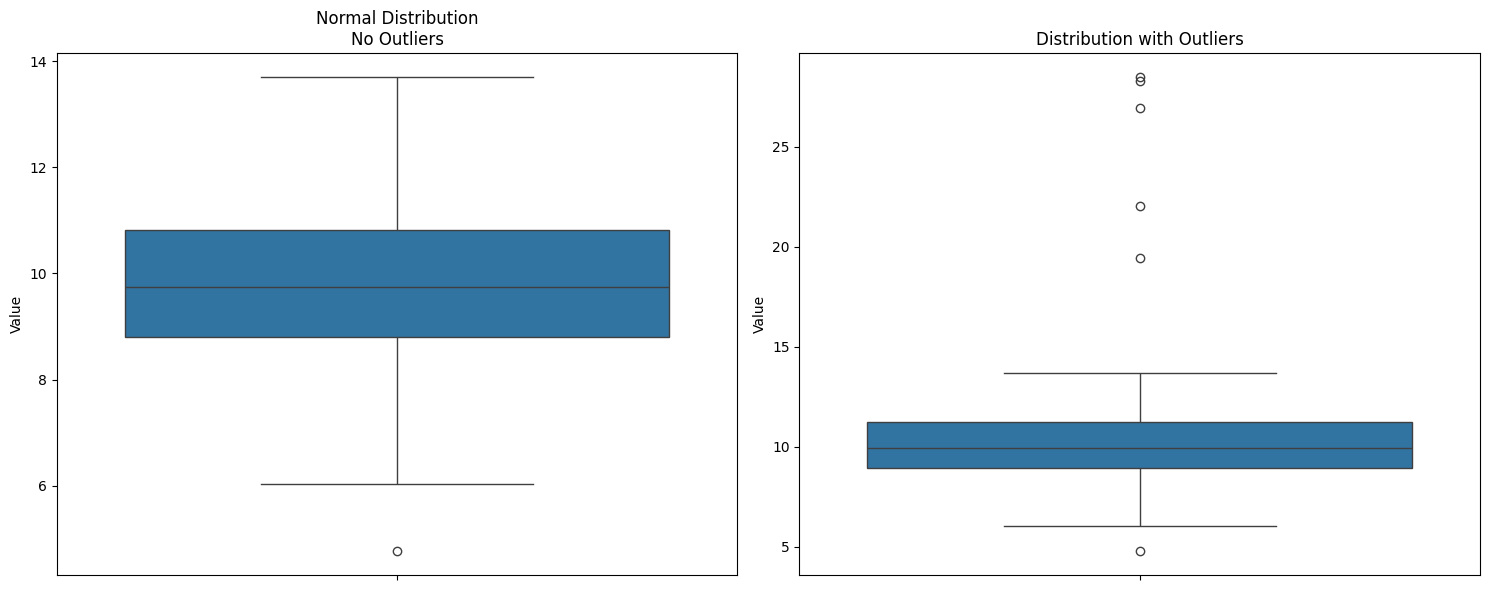

In [10]:
print("Example 1: Box Plot - Univariate Outliers")
plot_boxplots()

### Example 2: Z Score method 



**The provided example**

- Illustrates how data points that deviate significantly (e.g., an injected anomaly at index 50) are flagged based on their Z-scores. 

- The plot visually demonstrates the anomaly's deviation from the normal data distribution, making it easy to interpret and act upon.

**Applications:**

The Z-score method is widely used in monitoring financial transactions for fraud, detecting anomalies in sensor readings for industrial equipment, and identifying unusual patterns in website traffic. 

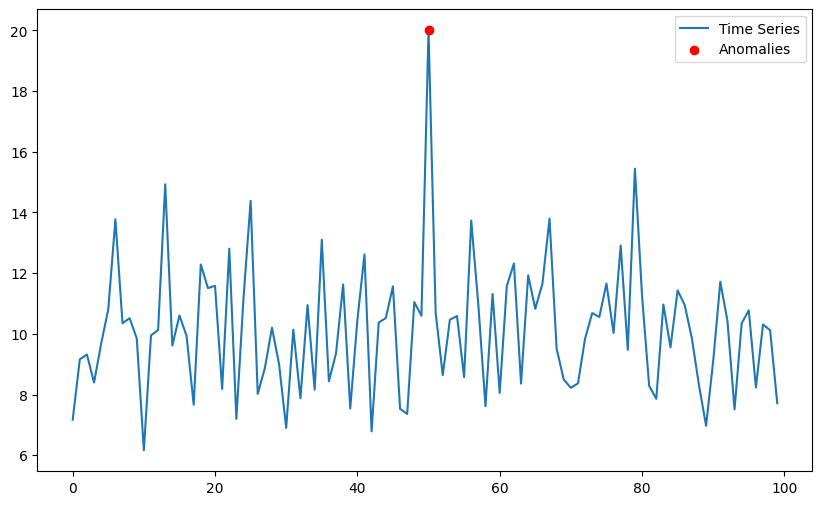

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic time series data
data = np.random.normal(loc=10, scale=2, size=100)
data[50] = 20  # Inject anomaly

# Compute Z-scores
mean = np.mean(data)
std_dev = np.std(data)
z_scores = (data - mean) / std_dev

# Flag anomalies
threshold = 3
anomalies = np.where(np.abs(z_scores) > threshold)[0]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data, label="Time Series")
plt.scatter(anomalies, data[anomalies], color="red", label="Anomalies", zorder=5)
plt.legend()
plt.show()

### Example 3: Context-based Outliers

This example introduces the concept of contextual anomalies, where data points are considered outliers based on their relationship with other variables. 

The visualization shows:

- A normal relationship between temperature and energy usage (left plot)
- Anomalous energy usage patterns that deviate from the expected relationship (right plot, red X's)

**This scenario is particularly relevant in:**

- Energy consumption monitoring
- Financial fraud detection where transactions are evaluated in context
- Seasonal pattern analysis where behavior should follow certain trends

#### Define custom functions

In [15]:
# Example : Context-based Outliers

def generate_context_data(n_samples=200, n_outliers=10):
    """Generate 2D data with context-based outliers"""
    # Generate normal data points following a pattern
    x = np.linspace(0, 10, n_samples)
    y = 2 * x + np.random.normal(0, 1, n_samples)
    normal_data = np.column_stack((x, y))
    
    # Create copy and add contextual outliers
    data_with_outliers = np.copy(normal_data)
    outlier_indices = np.random.choice(n_samples, n_outliers, replace=False)
    
    # Add outliers that deviate from the pattern
    data_with_outliers[outlier_indices, 1] += np.random.normal(8, 2, n_outliers)
    
    return normal_data, data_with_outliers, outlier_indices

def plot_context_outliers():
    """Plot context-based outliers"""
    normal_data, data_with_outliers, outlier_indices = generate_context_data()
    fig, (ax1, ax2) = create_figure()
    
    # Plot without outliers
    ax1.scatter(normal_data[:, 0], normal_data[:, 1], c='blue', label='Normal Data')
    ax1.set_title('Temperature vs. Energy Usage\nNormal Pattern')
    ax1.set_xlabel('Temperature (°C)')
    ax1.set_ylabel('Energy Usage (kWh)')
    ax1.legend()
    
    # Plot with outliers
    normal_points = np.delete(data_with_outliers, outlier_indices, axis=0)
    outliers = data_with_outliers[outlier_indices]
    
    ax2.scatter(normal_points[:, 0], normal_points[:, 1], c='blue', label='Normal Data')
    ax2.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', s=100, label='Outliers')
    ax2.set_title('Temperature vs. Energy Usage\nWith Anomalous Usage Patterns')
    ax2.set_xlabel('Temperature (°C)')
    ax2.set_ylabel('Energy Usage (kWh)')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

#### Plot context based outliers 


Example 3: Context-based Outliers


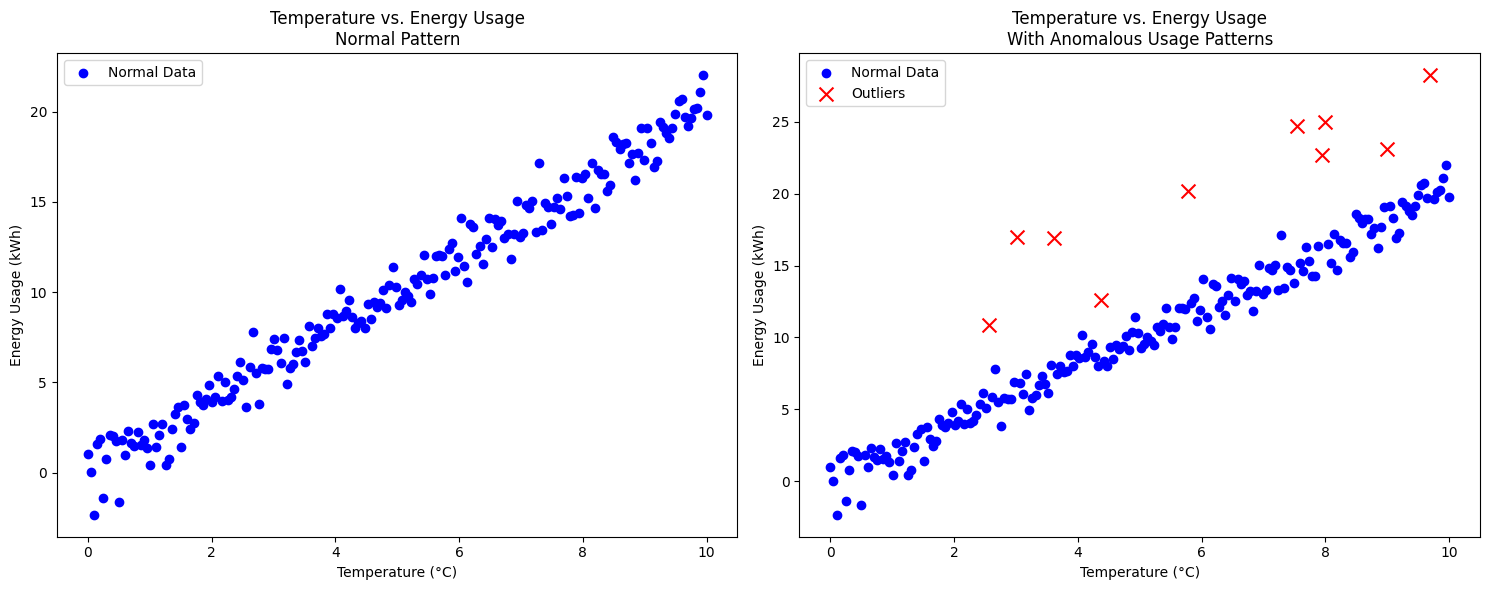

In [20]:
print("\nExample 3: Context-based Outliers")
plot_context_outliers()

### Example 4: Cluster based Outliers

This example demonstrates density-based anomaly detection, where outliers are identified based on their isolation from natural clusters in the data. 

**The plots show:**

- Normal clustering patterns representing typical customer segments (left plot)
- Outliers that don't belong to any natural cluster (right plot, red X's)

This approach is valuable for:

Customer segmentation analysis
Network intrusion detection
Image processing where pixels should form natural clusters

#### Custom functions 

In [18]:
# Example 4: Cluster-based Outliers
def generate_cluster_data(n_samples=300, n_outliers=15):
    """Generate clustered data with outliers"""
    # Generate normal clustered data
    X, _ = make_blobs(n_samples=n_samples, centers=3, cluster_std=1.0)
    normal_data = StandardScaler().fit_transform(X)
    
    # Create copy and add outliers
    data_with_outliers = np.copy(normal_data)
    
    # Generate outliers in sparse regions
    outliers = np.random.uniform(low=-4, high=4, size=(n_outliers, 2))
    data_with_outliers = np.vstack([data_with_outliers, outliers])
    
    return normal_data, data_with_outliers, n_outliers

def plot_cluster_outliers():
    """Plot cluster-based outliers"""
    normal_data, data_with_outliers, n_outliers = generate_cluster_data()
    fig, (ax1, ax2) = create_figure()
    
    # Plot without outliers
    ax1.scatter(normal_data[:, 0], normal_data[:, 1], c='blue', label='Normal Data')
    ax1.set_title('Customer Segmentation\nNormal Clusters')
    ax1.set_xlabel('Feature 1 (Normalized Spending)')
    ax1.set_ylabel('Feature 2 (Normalized Frequency)')
    ax1.legend()
    
    # Plot with outliers
    normal_points = data_with_outliers[:-n_outliers]
    outliers = data_with_outliers[-n_outliers:]
    
    ax2.scatter(normal_points[:, 0], normal_points[:, 1], c='blue', label='Normal Data')
    ax2.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', s=100, label='Outliers')
    ax2.set_title('Customer Segmentation\nWith Anomalous Customers')
    ax2.set_xlabel('Feature 1 (Normalized Spending)')
    ax2.set_ylabel('Feature 2 (Normalized Frequency)')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()



Example 4: Cluster-based Outliers


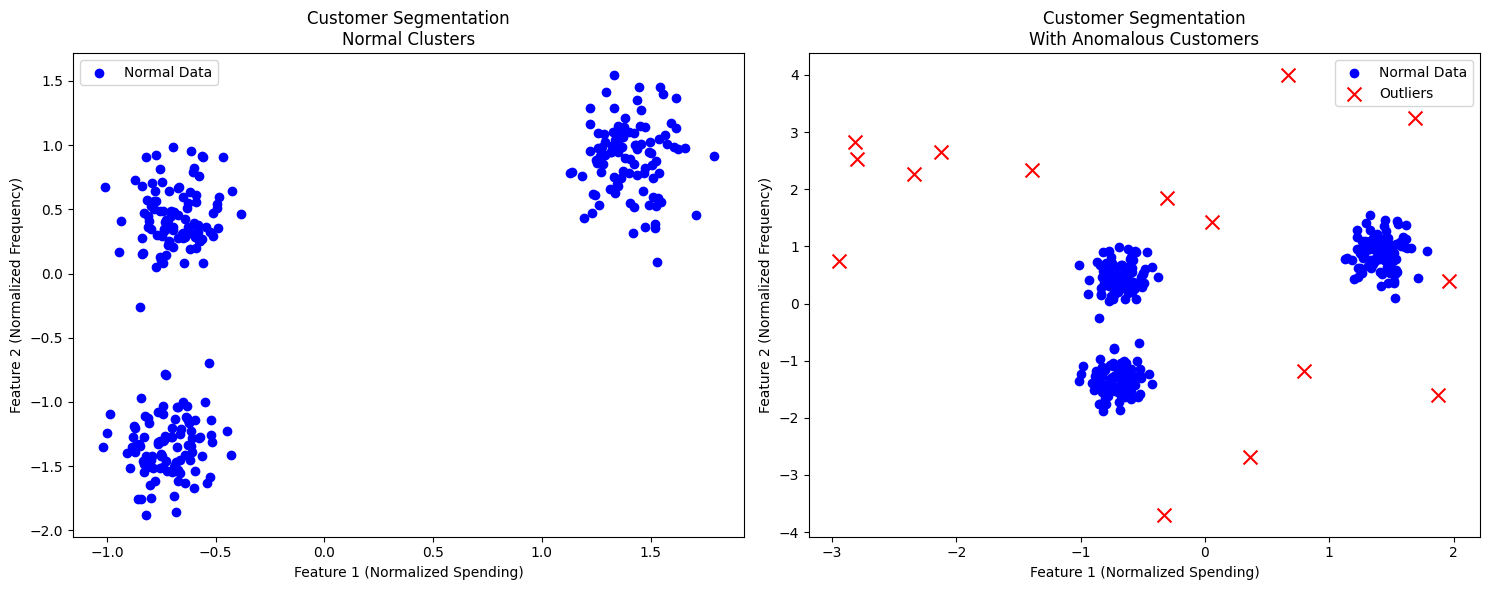

In [21]:
print("\nExample 4: Cluster-based Outliers")
plot_cluster_outliers()    
    

### Example 5 :  Anomaly pts in Regular Periodic Data 

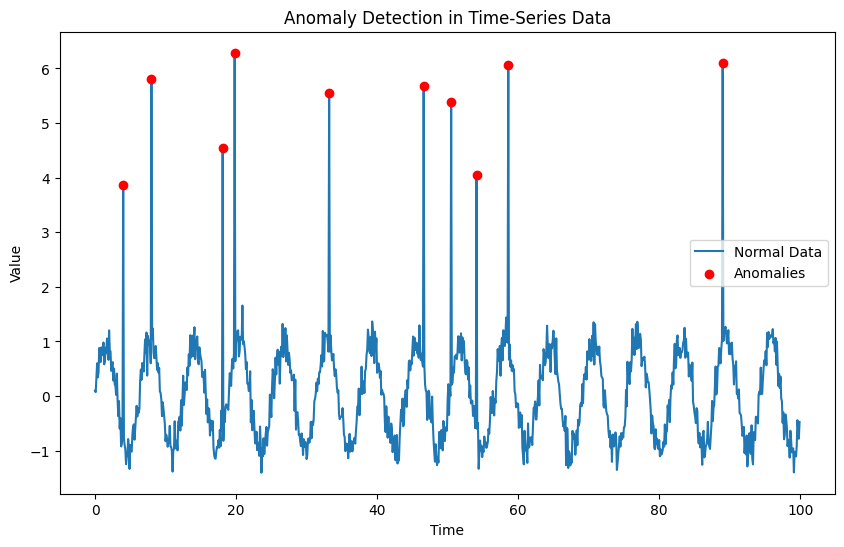

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Generate synthetic time-series data
np.random.seed(42)
time = np.arange(0, 100, 0.1)
data = np.sin(time) + np.random.normal(0, 0.2, len(time))  # normal data
anomalies = np.random.choice(np.arange(len(data)), size=10, replace=False)  # inject anomalies
data[anomalies] += np.random.normal(5, 0.5, len(anomalies))  # exaggerated anomaly spikes

# Plot the data with anomalies marked
plt.figure(figsize=(10, 6))
plt.plot(time, data, label='Normal Data')
plt.scatter(time[anomalies], data[anomalies], color='red', label='Anomalies', zorder=5)
plt.title('Anomaly Detection in Time-Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()



### A Simple Time Series with Level Shift 

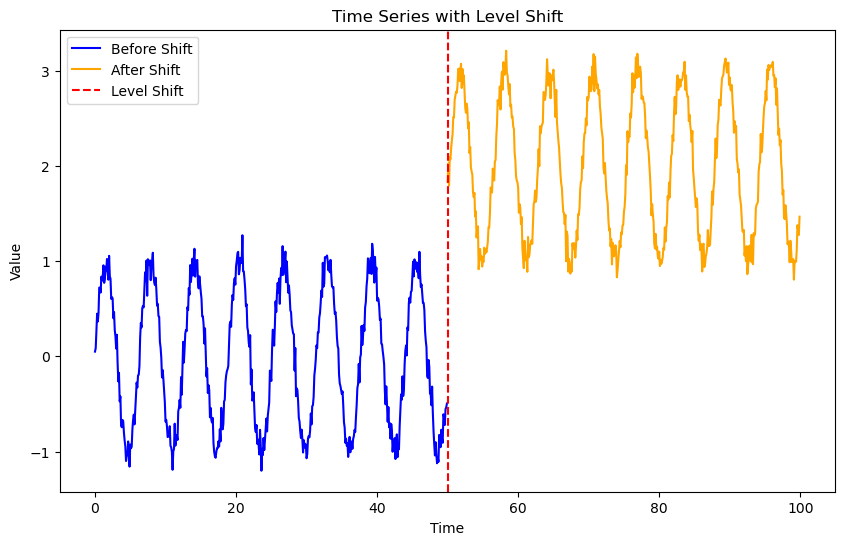

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic time-series data with a level shift
np.random.seed(42)
time = np.arange(0, 100, 0.1)

# First part of the time series (normal level)
data_before_shift = np.sin(time[:500]) + np.random.normal(0, 0.1, len(time[:500]))

# Second part of the time series (shifted level)
data_after_shift = np.sin(time[500:]) + 2 + np.random.normal(0, 0.1, len(time[500:]))

# Combine the two parts to create a full time-series with a level shift
data = np.concatenate([data_before_shift, data_after_shift])

# Plot the time-series with different colors for before and after the level shift
plt.figure(figsize=(10, 6))
plt.plot(time[:500], data_before_shift, label='Before Shift', color='blue')
plt.plot(time[500:], data_after_shift, label='After Shift', color='orange')
plt.axvline(x=time[500], color='red', linestyle='--', label='Level Shift')
plt.title('Time Series with Level Shift')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


### A Cyclic Time Series with Level Shift 

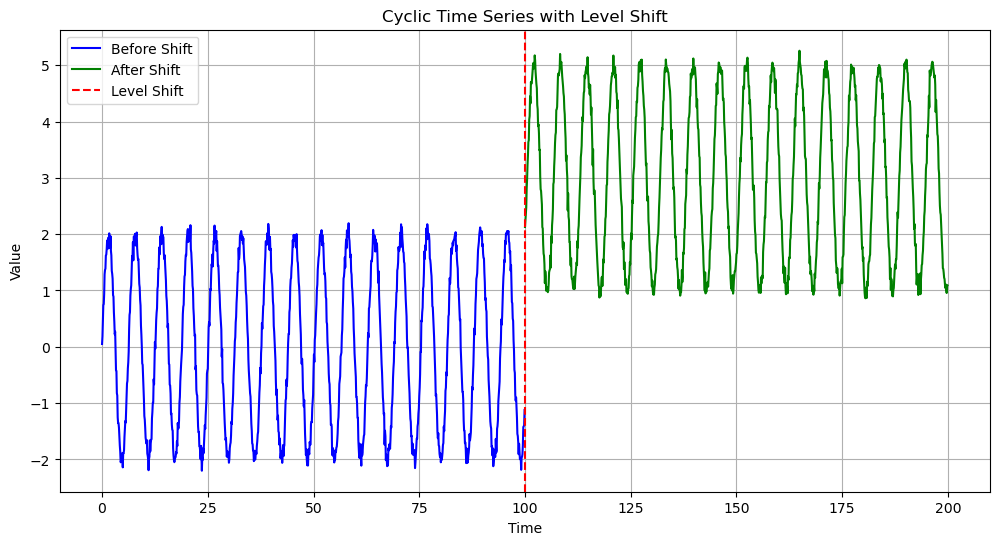

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic cyclic time-series data with a level shift
np.random.seed(42)
time = np.arange(0, 200, 0.1)

# First part of the cyclic time series (before level shift)
cyclic_before_shift = 2 * np.sin(time[:1000]) + np.random.normal(0, 0.1, len(time[:1000]))

# Second part of the cyclic time series (after level shift)
cyclic_after_shift = 2 * np.sin(time[1000:]) + 3 + np.random.normal(0, 0.1, len(time[1000:]))

# Combine the two parts to create a cyclic time-series with a level shift
cyclic_data = np.concatenate([cyclic_before_shift, cyclic_after_shift])

# Plot the cyclic time-series with different colors for before and after the level shift
plt.figure(figsize=(12, 6))
plt.plot(time[:1000], cyclic_before_shift, label='Before Shift', color='blue')
plt.plot(time[1000:], cyclic_after_shift, label='After Shift', color='green')
plt.axvline(x=time[1000], color='red', linestyle='--', label='Level Shift')
plt.title('Cyclic Time Series with Level Shift')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


### Uptrending Time Series with Level Shift

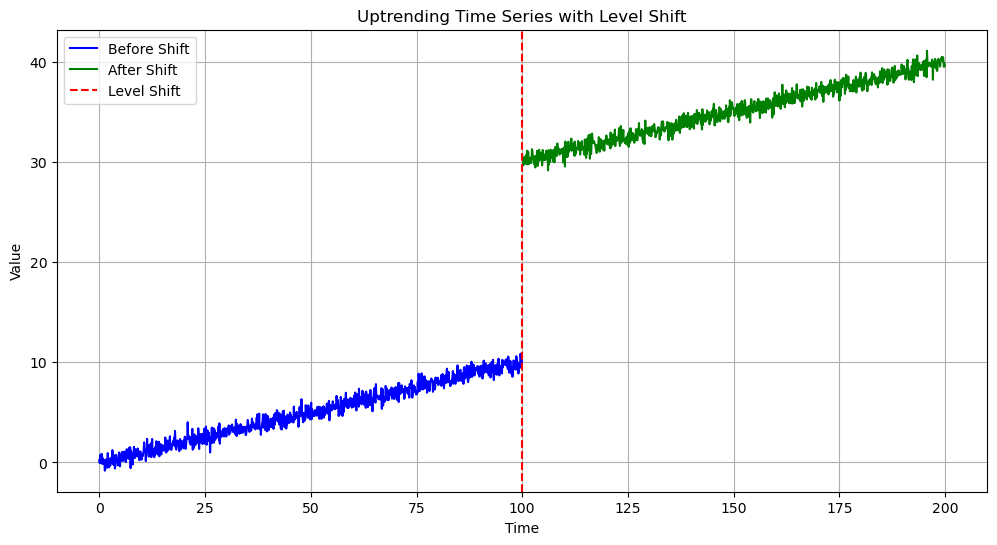

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate an uptrending time series
np.random.seed(42)
time = np.arange(0, 200, 0.1)

# Uptrend before the level shift
uptrend_before_shift = 0.1 * time[:1000] + np.random.normal(0, 0.5, len(time[:1000]))

# Uptrend after the level shift (with an upward shift)
level_shift_value = 20  # The amount of shift in the data
uptrend_after_shift = 0.1 * time[1000:] + level_shift_value + np.random.normal(0, 0.5, len(time[1000:]))

# Combine the two parts to create an uptrending time series with a level shift
uptrend_data = np.concatenate([uptrend_before_shift, uptrend_after_shift])

# Plot the uptrending time series with different colors before and after the level shift
plt.figure(figsize=(12, 6))
plt.plot(time[:1000], uptrend_before_shift, label='Before Shift', color='blue')
plt.plot(time[1000:], uptrend_after_shift, label='After Shift', color='green')
plt.axvline(x=time[1000], color='red', linestyle='--', label='Level Shift')
plt.title('Uptrending Time Series with Level Shift')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


### Level Shift Detection with Rolling Mean in Time Series 

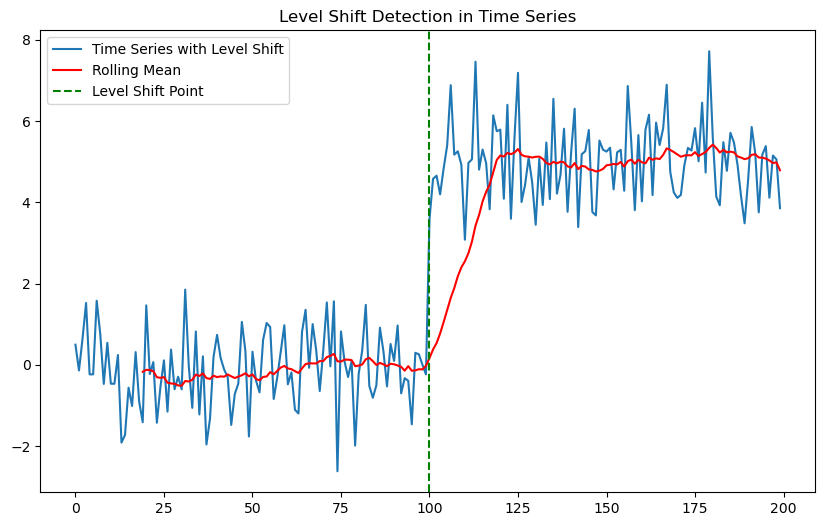

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Simulate time series with level shift
np.random.seed(42)
n = 200
time = np.arange(n)
data = np.random.normal(loc=0, scale=1, size=n)
data[100:] += 5  # Introduce a level shift at t=100

# Detect level shift using moving average
window_size = 20
rolling_mean = np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Plot original time series and rolling mean
plt.figure(figsize=(10,6))
plt.plot(time, data, label="Time Series with Level Shift")
plt.plot(time[window_size-1:], rolling_mean, label="Rolling Mean", color='red')
plt.axvline(x=100, color='green', linestyle='--', label="Level Shift Point")
plt.title("Level Shift Detection in Time Series")
plt.legend()
plt.show()


## End of Notebook